- 1) read NetCDF file  around Yuma
- 2) plot cropped data 
- 3) create/write dataframe to csv file
- 4) read csv file for double check

In [9]:
import os.path
import numpy as np
import xarray as xr
import pandas as pd

- 1) read NetCDF file  around Yuma

In [6]:
i_s = 320
i_e = 420
j_s = 250
j_e = 350

# Yuma location
lon_pt = -114.47603157249804
lat_pt = 32.665135

flnm_i = '/glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData_PGW/GWBT/GWBT_198706_CONUS404.nc'
with xr.open_dataset(flnm_i) as ds:
    print(ds)
    data_2d = ds.__xarray_dataarray_variable__[0, i_s:i_e, j_s:j_e]     
    lat_2d = ds.lat[i_s:i_e, j_s:j_e]
    lon_2d = ds.lon[i_s:i_e, j_s:j_e] 

<xarray.Dataset>
Dimensions:                        (time: 720, y: 1015, x: 1367)
Coordinates:
  * time                           (time) datetime64[ns] 1987-06-01 ... 1987-...
    lat                            (y, x) float32 ...
    lon                            (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    __xarray_dataarray_variable__  (time, y, x) float64 ...


- 2) Plot cropped data

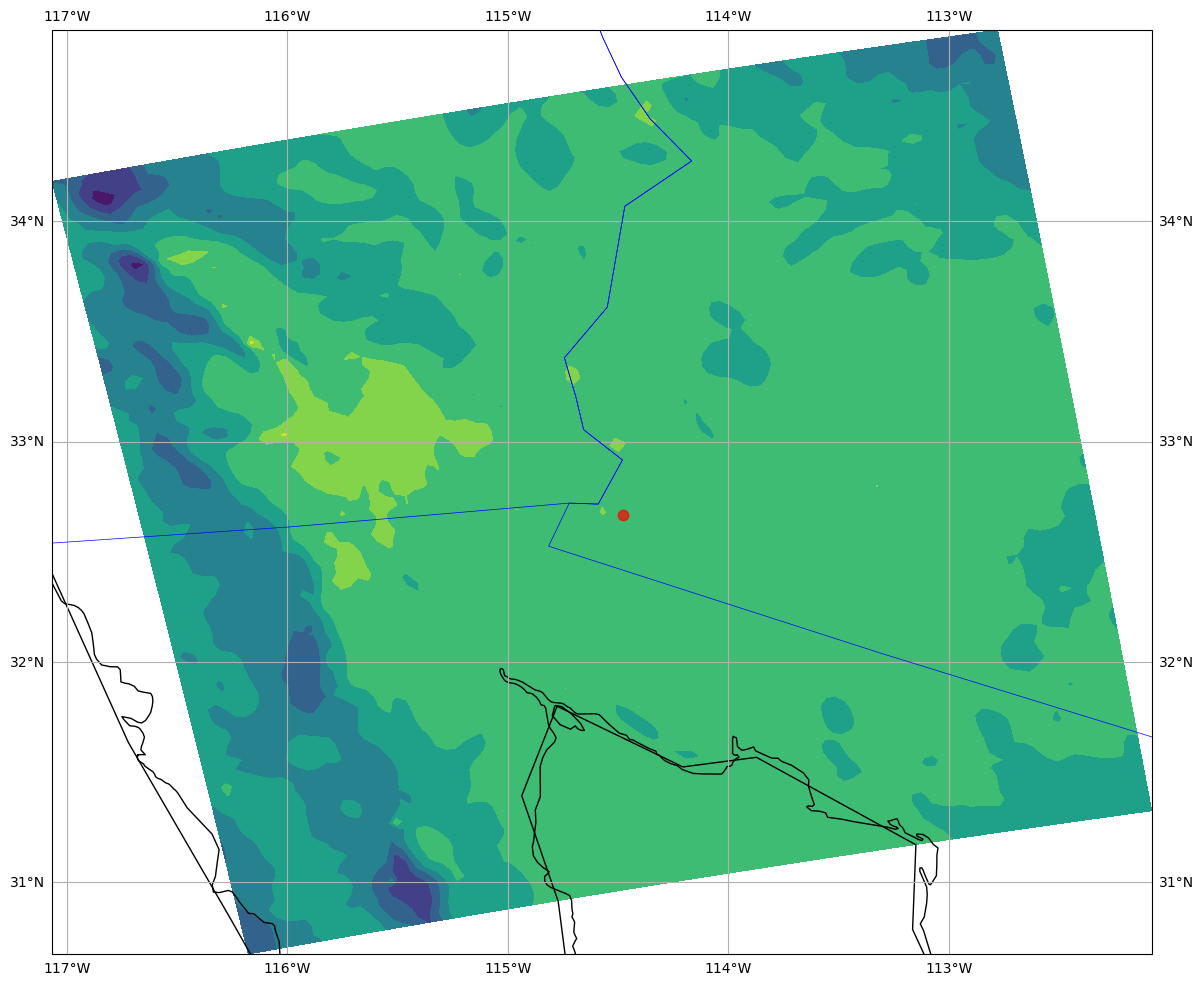

In [7]:
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

mm =ax.contourf(lon_2d, lat_2d, data_2d)
                  
ax.plot(lon_pt, lat_pt, marker='.', color='red', markersize=15, alpha=0.7, transform=ccrs.Geodetic())

ax.coastlines()
 
ax.coastlines(lw=1, resolution='110m')
ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=.5, edgecolor='b')

gl = ax.gridlines(draw_labels=True)   
gl.xlines = gl.ylines = True

- 3) create/write dataframe to csv file

In [25]:
n_lat = lat_2d.shape[0]   # lat(y,x)
n_lon = lat_2d.shape[1]

lat_1d = np.zeros((n_lat*n_lon))
lon_1d = np.zeros((n_lat*n_lon))
data_1d = np.zeros((n_lat*n_lon))
 
ct = 0
for ii in range(n_lat):
    for jj in range(n_lon):
        lat_1d[ct] = lat_2d[ii,jj]
        lon_1d[ct] = lon_2d[ii,jj]
        data_1d[ct] = data_2d[ii, jj]
        ct = ct + 1
df = pd.DataFrame(data={'lat': lat_1d, 'lon': lon_1d, 'WBGT': data_1d})
df.to_csv('WBGT_1987060100_future.csv')

- 4) read dataframe for doulbe check 

In [26]:
df = pd.read_csv('WBGT_1987060100_future.csv')  
df

,Unnamed: 0,lat,lon,WBGT
0,0,30.675213,243.822739,290.647438
1,1,30.682583,243.863770,290.544778
2,2,30.689938,243.904800,290.725640
3,3,30.697273,243.945847,290.689442
4,4,30.704590,243.986908,292.382033
...,...,...,...,...
9995,9995,34.842125,247.046936,289.142869
9996,9996,34.848259,247.090637,289.778164
9997,9997,34.854382,247.134338,291.210414
9998,9998,34.860477,247.178040,291.993113
